<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/Housing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [238]:
od.download("https://www.kaggle.com/datasets/camnugent/california-housing-prices")

Skipping, found downloaded files in "./california-housing-prices" (use force=True to force download)


In [239]:
data = pd.read_csv("/content/california-housing-prices/housing.csv")

In [240]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [241]:
data.dropna(inplace=True)

In [242]:
data.shape

(20433, 10)

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X = data.drop(['median_house_value'], axis=1)
X = X.drop(['ocean_proximity'], axis=1)
y = data['median_house_value']
X['rooms_per_household'] = X['total_rooms'] / X['households']
X['bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']
X['population_per_household'] = X['population'] / X['households']
X.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis=1, inplace=True)
# X_encoded = pd.get_dummies(X, columns=['ocean_proximity'])

In [245]:
print(X_encoded.shape, y.shape, X.shape)

(20433, 13) (20433,) (20433, 7)


In [246]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [247]:
from sklearn.linear_model import LinearRegression

In [248]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [249]:
y_pred = model.predict(x_test)

In [250]:
y_pred

array([208574.98190041, 172954.87267882, 192931.64128822, ...,
       117504.23394422, 148512.39566311, 157068.36387088])

In [251]:
from sklearn.metrics import mean_squared_error, r2_score

In [252]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100

In [253]:
print(mse, r2)

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Average error: {mape * 100:.2f}%")

5393801545.193584 60.557731341319474
Average error: 31.35%


In [254]:
from sklearn.preprocessing import StandardScaler

In [255]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [256]:
# 3. Predict
rf_pred = rf_model.predict(x_test)

# 4. Evaluate
print("New R2 Score:", r2_score(y_test, rf_pred) * 100)

New R2 Score: 80.42835158347604


In [257]:
mape = mean_absolute_percentage_error(y_test, rf_pred)
print(f"Average error: {mape * 100:.2f}%")

Average error: 18.49%


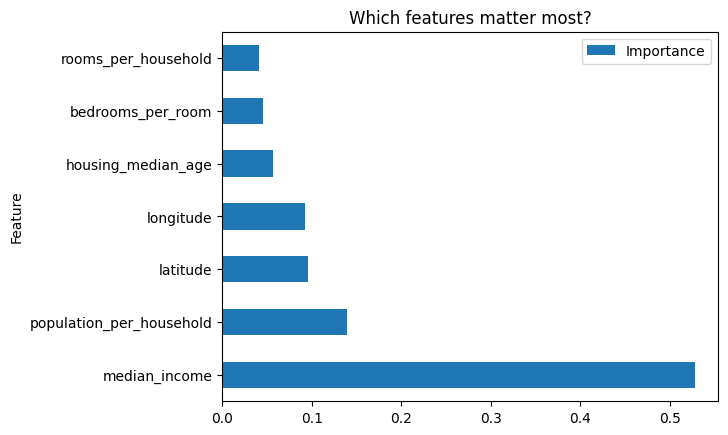

In [258]:
importances = rf_model.feature_importances_

# 2. Match them with the column names
feature_names = x_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 3. Sort and Plot
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df.plot(kind='barh', x='Feature', y='Importance')
plt.title('Which features matter most?')
plt.show()

In [259]:
# New R2 Score: 82.38835420128243